Control Sintético e Historia del Pensamiento:
Este script hace parte de mi proyecto final de Econometría Avanzada de la Maestría en Economía de la Universidad de los Andes. Este proyecto:
    #1. Hace webscraping sobre la página de Google N-grams para obtener datos de citas de los conceptos de economía y no economía con los que se quiere hacer el control sintético.
    #2. Trata los datos y los guarda multiplicados por 1'000.000 y como logaritmo
    #3. Concatena la base de datos que hice manualmente con las características de los datos

In [1]:
#Instalo los paquetes que necesitaré
!pip install -U matplotlib #Para los gráficos bonitos
!pip install pandas #Para tratar data frames
!pip install requests #Para hacer peticiones a aplicaciones HTTP
!pip install SyntheticControlMethods

import urllib
import re
import sys
import requests
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
from collections import defaultdict

In [3]:
    #Corpora es el diccionario de idiomas en los que puedo hacer la búsqueda de los N-gramas
    # idiomas ={'eng_us_2012':17, 'eng_us_2009':5, 'eng_gb_2012':18, 'eng_gb_2009':6, 'chi_sim_2012':23, 'chi_sim_2009':11,'eng_2012':15, 'eng_2009':0,'eng_fiction_2012':16, 'eng_fiction_2009':4, 'eng_1m_2009':1, 'fre_2012':19, 'fre_2009':7, 'ger_2012':20, 'ger_2009':8, 'heb_2012':24, 'heb_2009':9, 'spa_2012':21, 'spa_2009':10, 'rus_2012':25, 'rus_2009':12, 'ita_2012':22}
    idiomas ={'en-2019':1, 'en-US-2019':2, 'en-GB-2019': 3} 

In [2]:
    # Creo la función runQuery para que busque los datos de los N-gramas que le pida
def runQuery(query, start_year=1960,
			end_year=2019, corpus=26,
			smoothing=0):

	# Esta función convierte strings normales en formato URL
	# Por ejemplo: joan Miró
	# Lo convierte en: joan+Mir%C3%B3
	query = urllib.parse.quote(query)

	# Creo mi URL
	# Es muy importante usar JSON para extraer esta información, no se usa HTML
	url = 'https://books.google.com/ngrams/json?content=' + query + '&year_start=' + str(start_year) + '&year_end=' + str(end_year) + '&corpus=' + str(corpus) + '&smoothing=' + str(smoothing) + ''
    # Creo la URL del HTML para revisar qié está buscando
	url_revision = 'https://books.google.com/ngrams/graph?content=' + query + '&year_start=' + str(start_year) + '&year_end=' + str(end_year) + '&corpus=' + str(corpus) + '&smoothing=' + str(smoothing) + ''
    # Quiero que muestre esa url
	print(url_revision)
    
	response = requests.get(url)
    
	# Extraigo el contenido json de la url
	output = response.json()

	# Hago una lista con mis datos
	list_data = []
	return_dataframe = pd.DataFrame(list_data, columns=['Citas'])

	if len(output) == 0:
		# if no data returned from site,
		# print the following statement
		return "No data available for this Ngram."
	else:
		# if data returned from site,
		# store the data in return_data list
		for num in range(len(output)):
			
			# getting the name
			list_data.append((
								output[num]['timeseries'])
							)

	return list_data

In [3]:
    #Hago una lista dependiendo de los N-gramas que quiera extraer
    ngramas_1 = []
    ngramas_1 = [
 "invisible hand", "big bang", "animal spirits", "austerity", "black hole",
        "central bank", "game theory", "evolution theory", "butterfly effect", "marxism", 
        "Cambridge equation", "communism", "laissez-faire", "Nash equilibrium", 
        "Pareto efficiency", "Phillips curve", "physiocracy", "profit", "Say's law", 
        "wormhole", 'time paradox', "alien"
]
    ngramas_2 = []
    ngramas_2 = ["euclidean geometry", "mercantilism", 
        "econometrics", "free rider", "GDP", "indexation", "hysteresis", 
        "Newton's law"
]
    ngramas_3 = []
    ngramas_3 = [
       "subsidy", "supply and demand",
        "business cycle", "ceteris paribus", "currency",
        "absolute advantage", "comparative advantage", "hypothesis", "placebo",
        "paradigm", "entropy", "general relativity", "microeconomics", "macroeconomics"
]
    

In [4]:
    #Hago una lista de los idiomas que quiero examinar
    corpora = ['en-2019']
    # Idioma inglés: 0, 1, 4, 5, 15, 16, 17, 18

In [6]:
    # Defino los años con los que voy a trabajar y creo una columna
    column_fecha = []
    column_fecha = pd.DataFrame(column_fecha)
    
    start_year = 1950
    end_year = 2019
    column_fecha = pd.DataFrame({'Años': list(range(start_year, end_year + 1))})
    column_fecha

,Años
0,1950
1,1951
2,1952
3,1953
4,1954
...,...
65,2015
66,2016
67,2017
68,2018


In [7]:
    #Creo el dataframe para concatenar la información con los años
    df_terminos = []
    df_terminos = pd.DataFrame(df_terminos)
    df_terminos = pd.concat([df_terminos, column_fecha], axis=1, ignore_index=False)
    #Hago un loop que recorra los ngramas
    for termino in ngramas_1:
        
        query = termino 
        smoothing = 0
        
        #Hago otro loop que recorra los idiomas
        for corpus in corpora: # Extrae la información para cada leguaje  
            try:
                datos_conteo = runQuery(query, start_year, end_year, corpus, smoothing)
                df_conteo = []
                df_conteo = pd.DataFrame(datos_conteo)
                df_conteo = df_conteo.T
                
                #concateno un título a los datos "termino+numero de idioma"
                df_conteo = df_conteo.set_axis([ str(query) + str(corpus) ], axis=1) 
                #concateno la columan a mi dataframe con todos los terminos
                df_terminos = pd.concat([df_terminos, df_conteo], axis=1, ignore_index=False)
            
            except Exception as SR:
                print(f'Error para el término {query} y corpus {corpus}: {SR}')
            continue

In [10]:
df_terminos

,Años,invisible handen-2019,big bangen-2019,animal spiritsen-2019,austerityen-2019,black holeen-2019,central banken-2019,game theoryen-2019,evolution theoryen-2019,butterfly effecten-2019,...,currencyen-2019,absolute advantageen-2019,comparative advantageen-2019,hypothesisen-2019,placeboen-2019,paradigmen-2019,entropyen-2019,general relativityen-2019,microeconomicsen-2019,macroeconomicsen-2019
0,1950,6.699916e-08,1.840273e-08,1.465607e-07,0.000001,3.405056e-08,9.071334e-07,2.611645e-08,1.917410e-08,1.101960e-10,...,0.000022,1.068901e-08,1.277172e-07,0.000014,3.855954e-07,1.941305e-07,0.000003,8.738542e-08,9.619603e-09,1.808022e-08
1,1951,6.416352e-08,2.059148e-08,1.232076e-07,0.000001,4.687122e-08,1.259266e-06,2.309431e-08,2.263925e-08,4.550604e-10,...,0.000020,1.319675e-08,1.453918e-07,0.000014,2.923074e-07,2.021733e-07,0.000003,7.337849e-08,9.576000e-09,1.256850e-08
2,1952,6.655151e-08,1.573242e-08,1.776971e-07,0.000001,3.904809e-08,1.116775e-06,3.350213e-08,1.890154e-08,5.659143e-10,...,0.000018,1.233693e-08,1.527968e-07,0.000016,1.901119e-07,1.666604e-07,0.000002,7.537978e-08,5.237898e-09,1.166623e-08
3,1953,6.901235e-08,2.172820e-08,1.229388e-07,0.000001,7.227721e-08,8.494261e-07,5.167483e-08,1.666204e-08,5.629066e-10,...,0.000018,9.456832e-09,1.567132e-07,0.000016,2.253910e-07,2.432754e-07,0.000003,8.702536e-08,8.409228e-09,1.302838e-08
4,1954,6.256716e-08,2.302207e-08,9.175783e-08,0.000001,4.064663e-08,9.580046e-07,1.275577e-07,1.685348e-08,4.406138e-10,...,0.000018,2.511499e-08,1.990473e-07,0.000016,3.108086e-07,2.173228e-07,0.000003,9.032583e-08,9.615026e-09,1.529137e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2015,5.274464e-07,4.723464e-07,2.085344e-07,0.000003,1.889848e-06,2.284855e-06,7.336006e-07,6.430107e-08,6.753389e-08,...,0.000017,9.691344e-08,9.495954e-07,0.000023,5.877923e-06,1.319438e-05,0.000004,4.121308e-07,2.288716e-07,4.763206e-07
66,2016,6.107127e-07,4.895180e-07,2.176586e-07,0.000003,1.564626e-06,2.971353e-06,8.705631e-07,5.338123e-08,7.141254e-08,...,0.000019,1.586470e-07,1.205496e-06,0.000025,4.856471e-06,1.507010e-05,0.000005,4.243416e-07,2.660207e-07,6.110012e-07
67,2017,5.085762e-07,4.185061e-07,2.307247e-07,0.000003,1.577973e-06,1.993955e-06,6.816975e-07,4.972008e-08,6.555582e-08,...,0.000014,7.879837e-08,7.512641e-07,0.000023,4.547772e-06,1.318094e-05,0.000004,4.969241e-07,1.753410e-07,3.510457e-07
68,2018,5.036543e-07,3.895655e-07,2.468007e-07,0.000003,1.459614e-06,2.089435e-06,6.545915e-07,4.899854e-08,6.953815e-08,...,0.000012,5.919602e-08,6.732869e-07,0.000022,4.459048e-06,1.245673e-05,0.000005,4.481468e-07,1.587114e-07,3.141915e-07


In [161]:
df_terminos_copia

,invisible handen-2019,big bangen-2019,animal spiritsen-2019,austerityen-2019,black holeen-2019,central banken-2019,game theoryen-2019,evolution theoryen-2019,butterfly effecten-2019,marxismen-2019,...,socialismen-2019,physics envyen-2019,supply and demanden-2019,microeconomicsen-2019,macroeconomicsen-2019,subsidyen-2019,business cycleen-2019,ceteris paribusen-2019,currencyen-2019,absolute advantageen-2019
0,8.434903e+08,2.944579e+08,1.052241e+09,1.084389e+10,4.641742e+08,1.438431e+10,3.156724e+09,2.291171e+08,6.788654e+06,2.854595e+08,...,9.884479e+10,1.000000e-01,2.146120e+10,2.310438e+08,2.908118e+08,1.045906e+11,8.908411e+09,1.326333e+09,1.825567e+11,1.188014e+08
1,9.154014e+08,3.186073e+08,1.220535e+09,1.180957e+10,5.333897e+08,1.345759e+10,2.922944e+09,1.783249e+08,2.377666e+06,3.865707e+08,...,9.907958e+10,1.585111e+06,2.372828e+10,2.882618e+08,5.307016e+08,1.317840e+11,1.582257e+10,1.495552e+09,1.898829e+11,2.227080e+08
2,8.983198e+08,3.874662e+08,1.197760e+09,1.295912e+10,7.689136e+08,1.397737e+10,2.775462e+09,1.971187e+08,3.761808e+06,1.070440e+09,...,1.042327e+11,3.761808e+06,2.103880e+10,2.972565e+08,3.178114e+08,1.066993e+11,9.157746e+09,1.786106e+09,1.928333e+11,1.948617e+08
3,9.151469e+08,2.982335e+08,1.293755e+09,1.129884e+10,4.893004e+08,1.480874e+10,2.741915e+09,1.903618e+08,7.050439e+05,5.106525e+08,...,1.118855e+11,1.000000e-01,2.285040e+10,2.586614e+08,3.935508e+08,1.151140e+11,9.591416e+09,1.671659e+09,1.969347e+11,2.206787e+08
4,9.592851e+08,3.177632e+08,1.168379e+09,1.119119e+10,4.601571e+08,1.784270e+10,3.288549e+09,2.323269e+08,1.498883e+06,5.310378e+08,...,1.204983e+11,1.000000e-01,2.219722e+10,2.875798e+08,4.033996e+08,1.048540e+11,9.762225e+09,1.528861e+09,1.886807e+11,1.363984e+08
5,9.552571e+08,4.837433e+08,1.405030e+09,1.039477e+10,4.993698e+08,1.700439e+10,2.922163e+09,2.350775e+08,4.076488e+06,1.208296e+09,...,1.014797e+11,1.000000e-01,2.202355e+10,3.234977e+08,4.827471e+08,1.145874e+11,8.581008e+09,1.774631e+09,2.004807e+11,2.316804e+08
6,1.187617e+09,5.482834e+08,1.193556e+09,1.211073e+10,4.216042e+08,1.546674e+10,4.393525e+09,2.566573e+08,6.597875e+06,6.287959e+08,...,1.026456e+11,1.000000e-01,2.379233e+10,3.729792e+08,6.419680e+08,1.162080e+11,8.661031e+09,1.706210e+09,1.962314e+11,2.381833e+08
7,1.153033e+09,5.705237e+08,1.205171e+09,1.137627e+10,4.662473e+08,1.352656e+10,3.190618e+09,3.008434e+08,2.996448e+06,7.132594e+08,...,1.062524e+11,1.000000e-01,2.234963e+10,5.791692e+08,7.705468e+08,1.009863e+11,6.559824e+09,2.070546e+09,1.863275e+11,3.002441e+08
8,1.197296e+09,6.259526e+08,1.409274e+09,1.286376e+10,5.924823e+08,1.534758e+10,3.782726e+09,3.916607e+08,5.284778e+06,9.089231e+08,...,1.262175e+11,1.000000e-01,2.281749e+10,6.627178e+08,8.441322e+08,1.072369e+11,7.075730e+09,2.347029e+09,2.041918e+11,3.112147e+08
9,1.135037e+09,7.301271e+08,1.177813e+09,1.254974e+10,6.393007e+08,1.327413e+10,3.551019e+09,2.713072e+08,4.687814e+06,1.008214e+09,...,1.129150e+11,1.000000e-01,2.245214e+10,5.434998e+08,8.789554e+08,1.168204e+11,6.060172e+09,2.213234e+09,1.998663e+11,2.127096e+08


In [11]:
#Creo una nueva base como copia y sin los años
df_terminos_copia = df_terminos.copy()
df_terminos_copia = df_terminos_copia.iloc[: , 1:]
#Reviso que no hayan duplicados para poder multiplicar la columna 
print(df_terminos_copia.columns[df_terminos_copia.columns.duplicated(keep=False)])

Index([], dtype='object')


In [12]:
# Seleccionar todas las columnas excepto la primera
columnas_a_multiplicar = df_terminos.columns[1:]

# Multiplicar todas las columnas por 100
df_terminos_copia[columnas_a_multiplicar] += 0.000000001
df_terminos_copia[columnas_a_multiplicar] *= 100000000

#Son los términos originales de N-grams multiplicados por 100M
df_terminos_copia.to_excel('Datos_conteo_query_idioma.xlsx', index=False)
print(columnas_a_multiplicar)

Index(['invisible handen-2019', 'big bangen-2019', 'animal spiritsen-2019',
       'austerityen-2019', 'black holeen-2019', 'central banken-2019',
       'game theoryen-2019', 'evolution theoryen-2019',
       'butterfly effecten-2019', 'marxismen-2019',
       'Cambridge equationen-2019', 'communismen-2019', 'laissez-faireen-2019',
       'Nash equilibriumen-2019', 'Pareto efficiencyen-2019',
       'Phillips curveen-2019', 'physiocracyen-2019', 'profiten-2019',
       'Say's lawen-2019', 'wormholeen-2019', 'time paradoxen-2019',
       'alienen-2019', 'euclidean geometryen-2019', 'mercantilismen-2019',
       'econometricsen-2019', 'free rideren-2019', 'GDPen-2019',
       'indexationen-2019', 'hysteresisen-2019', 'Newton's lawen-2019',
       'subsidyen-2019', 'supply and demanden-2019', 'business cycleen-2019',
       'ceteris paribusen-2019', 'currencyen-2019',
       'absolute advantageen-2019', 'comparative advantageen-2019',
       'hypothesisen-2019', 'placeboen-2019', 'paradi

In [13]:
data_log = np.log10(df_terminos_copia)
data_log = pd.concat([column_fecha, data_log], axis=1, ignore_index=False)

In [17]:
#Convierto la base a datos panel
long_df = []
variables_for_long = [col for col in data_log.columns if col != "Años"]
long_df = pd.melt(data_log, id_vars = "Años", value_vars = variables_for_long , var_name="Variable", value_name="log_citas")

#Agrego las variables manuales
var_manuales = pd.read_excel("/Users/sara/Desktop/Econometria Avanzada/Trabajo Final/Variables_Manuales.xlsx")

#Hago merge entre las variables manuales y el log de las citas
long_df = pd.merge(long_df, var_manuales, left_on='Variable', right_on='Palabra', how='left')

#Agrego ID a las palabras
temp = defaultdict(lambda: len(temp))
long_df['ID'] = [temp[ele] for ele in long_df['Variable']]
long_df = long_df.drop(columns = ["Palabra"], axis = 1)
long_df

#Exporto la base de datos como dta
long_df.to_stata('Data_InvisibleHand.dta')

/var/folders/_p/k0b6_2y92695rmb6_whl6j640000gp/T/ipykernel_19744/1950438503.py:19: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    Años   ->   A_os

If this is not what you expect, please make sure you have Stata-compliant
column names in your DataFrame (strings only, max 32 characters, only
alphanumerics and underscores, no Stata reserved words)



In [220]:
##PROMEDIOS DE CITAS POR DÉCADAS PARA ARMAR MI MATRIZ DE PESOS
resultados_promedio = []
resultados_promedio = pd.DataFrame(resultados_promedio)
#Itero sobre cada columna
for columna in data_log.columns:
    #Excepto sobre el año
    if columna != "Años":
        #Para cada 10 años desde 1960 a 2019
        for año_inicio in range (1960, 2019, 10):
            año_fin = año_inicio+9
        
        #Filtro para cada década
            filtro_df = data_log[(data_log["Años"]>= año_inicio) & (data_log["Años"]< año_fin)]
            promedio = filtro_df[columna].mean()
        
        #Creo una nueva fila con los promedios
            nueva_fila = pd.DataFrame ({
                "Años" : [f'promedio{año_inicio}-{año_fin}'],
                columna : [promedio]
            })
            #Concateno los resultados al dataframe, va a salir como una matriz diagonal con los promedios
            resultados_promedio = pd.concat([resultados_promedio, nueva_fila], ignore_index =True)

# Elimino los N.A y hago shift up de los valores
resultados = resultados_promedio.apply(lambda x: pd.Series(x.dropna().values))
#Elimino las filas con N.A
resultados =resultados.dropna()
resultados.to_excel('Promedios_Decadas.xlsx', index=False)

In [199]:
# Acá de forma manual yo agrego mis otras variables, 
# tengo que solucioanr que solo sea hacer un merge sin borrar nada
# El archivo "variables manuales" es la que tiene mis otras variables

Acá empieza el ejercicio de crear un control sintético

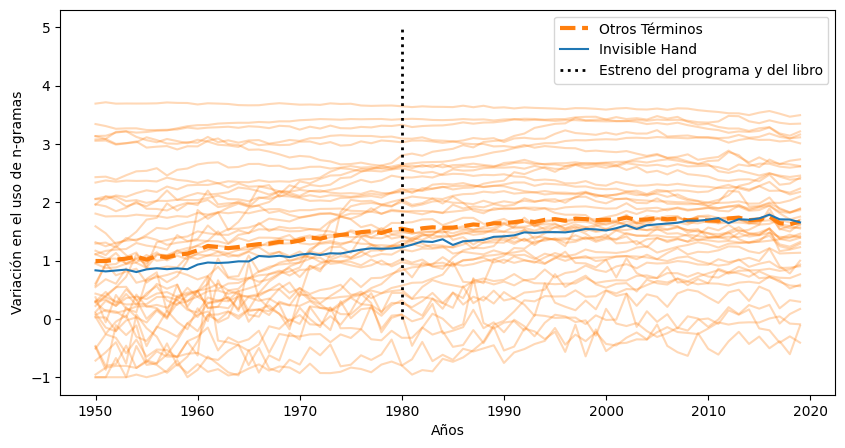

In [19]:
# Tendencias paralelas entre Mano invisible y los controles
# La hora de la verdad
plt.figure(figsize=(10, 5))

# Plot de las líneas
# Use data_log['Años'] as x-values
plt.plot(data_log['Años'], data_log.drop(columns=["invisible handen-2019", 'Años']), color="C1", alpha=0.3)
plt.plot(data_log['Años'], data_log.drop(columns=["invisible handen-2019", 'Años']).mean(axis=1), lw=3, color="C1", ls="dashed", label="Otros Términos")
plt.plot(data_log['Años'], data_log["invisible handen-2019"], color="C0", label="Invisible Hand")

# Línea vertical
plt.vlines(x=1980, ymin=0, ymax=5, linestyle=":", lw=2, label="Estreno del programa y del libro", color="black")

# Añadir leyendas
plt.legend()

# Etiquetas de los ejes y título
plt.xlabel('Años')
plt.ylabel("Variación en el uso de n-gramas")
plt.title("")

# Mostrar el gráfico
plt.savefig("Variacion.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [201]:
y = log_data[3].values # state of california
X = inverted.drop(columns=3).values  # other states

NameError: name 'log_data' is not defined

In [ ]:
from typing import List
from operator import add
from toolz import reduce, partial

def loss_w(W, X, y) -> float:
    return np.sqrt(np.mean((y - X.dot(W))**2))